# Korina Zaromytidou

Please find at the botom of the notebook my answers for  Tasks 1 & 2 for Assigment 3 Five Personality Traits.

The notebook is based on the Week 7.2a_Five_Personality notbook.

I had to run this in colab, as my personal laptop was very slow, so I had to ajbust the code to import the dataset files.

Code provided.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data-small.csv to data-small.csv


In [3]:
import pandas as pd

data = pd.read_csv('data-small.csv')
pd.options.display.max_columns = 150

In [ ]:
#import pandas as pd

#data = pd.read_csv('data/data-small.csv')
#pd.options.display.max_columns = 150

In [4]:
print('Number of participants: ', len(data))
data.head()

Number of participants:  50000


,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,549499,2.0,3.0,2.0,2.0,5.0,1.0,3.0,1.0,5.0,2.0,4.0,2.0,3.0,2.0,5.0,5.0,4.0,4.0,5.0,3.0,2.0,3.0,1.0,4.0,2.0,3.0,3.0,3.0,5.0,4.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,4.0,TR
1,811367,2.0,3.0,2.0,4.0,3.0,3.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,5.0,3.0,3.0,2.0,4.0,2.0,4.0,3.0,5.0,2.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,US
2,450151,4.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,2.0,1.0,5.0,2.0,3.0,5.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,4.0,3.0,2.0,4.0,1.0,5.0,4.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,5.0,1.0,3.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,US
3,919073,1.0,4.0,3.0,5.0,1.0,2.0,1.0,5.0,1.0,4.0,2.0,4.0,2.0,3.0,2.0,2.0,2.0,1.0,4.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,4.0,3.0,1.0,2.0,3.0,5.0,3.0,4.0,1.0,5.0,1.0,1.0,2.0,3.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,5.0,4.0,4.0,US
4,894414,3.0,1.0,4.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,4.0,4.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,4.0,3.0,3.0,3.0,3.0,1.0,2.0,2.0,3.0,2.0,4.0,4.0,MY


In [7]:
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  False
How many missing values?  0
Number of participants after eliminating missing values:  49906


In [8]:
# Defining a function to visualize the questions and answers distribution
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

In [9]:
from google.colab import files

uploaded = files.upload()

Saving questions.json to questions.json


In [10]:
#Load in questions databank
import json
with open("questions.json", "r") as fp:
    questions = json.load(fp)
traits = list(questions.keys())
colours = plt.colormaps.get("rainbow")

In [11]:
#Helper functions
def keys_for_trait(trait):
    return list(questions[trait].keys())

def questions_for_trait(trait):
    return list(questions[trait].values())

#Plot histogram for responses to each question
def vis_questions(trait, color):
    fig, ax = plt.subplots(2,5,figsize=(12,2))
    plt.subplots_adjust(bottom=0, top=2.5)
    qs = questions_for_trait(trait)
    codes = keys_for_trait(trait)
    for i in range(10):
        plot = ax[int(np.floor(i/5)),i%5]
        plot.hist(data[codes[i]], bins=14, color= color, alpha=.5)
        plot.set_title(qs[i], fontsize=8)
        plot.set_yticks([])
        plot.set_xticks(np.arange(0,6))

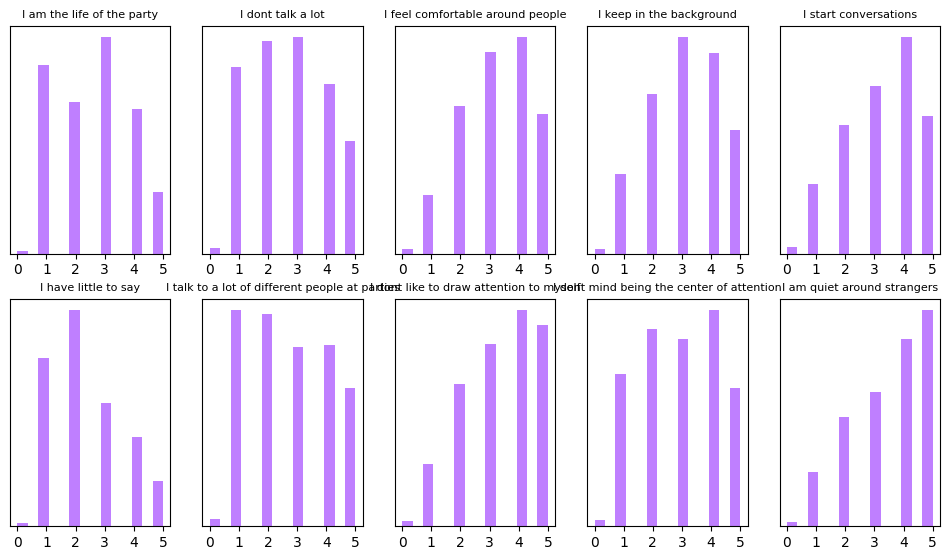

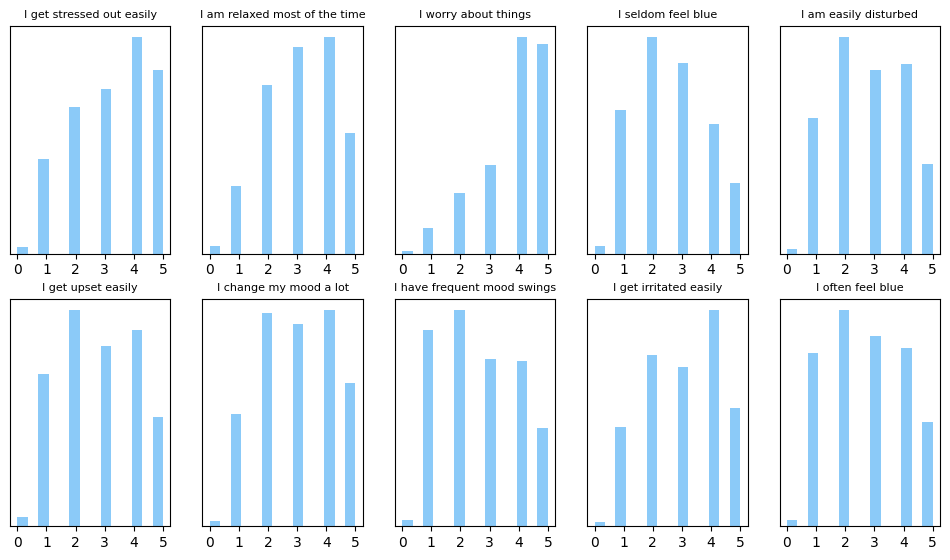

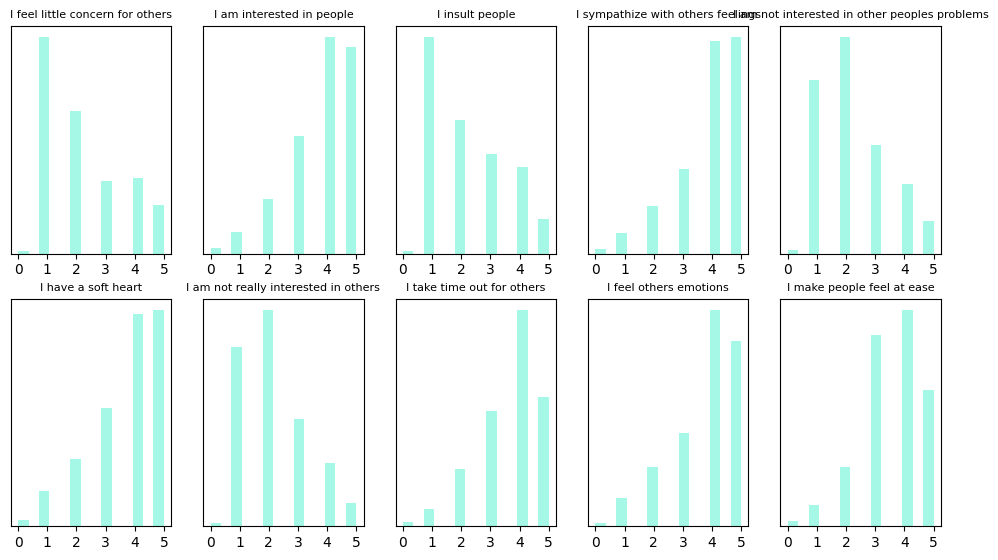

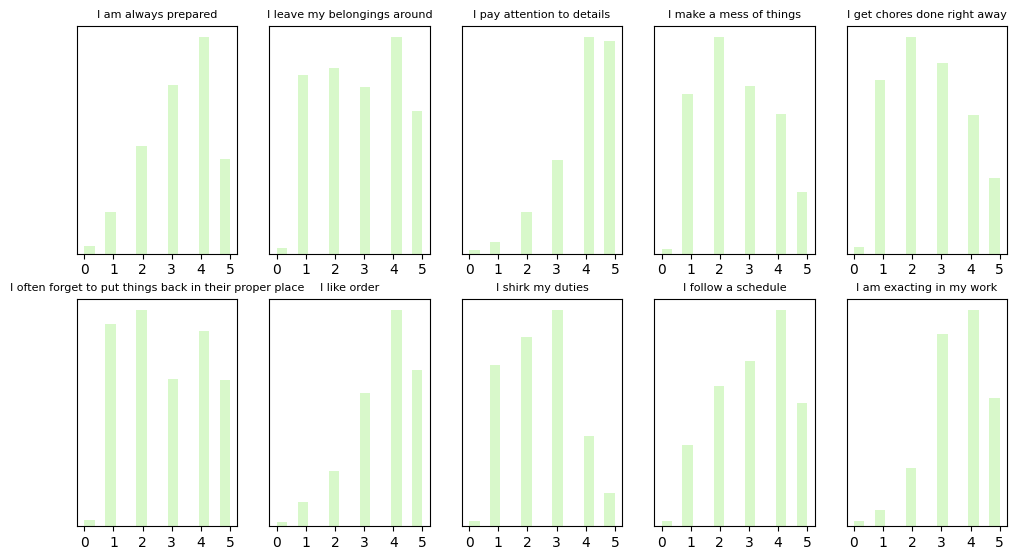

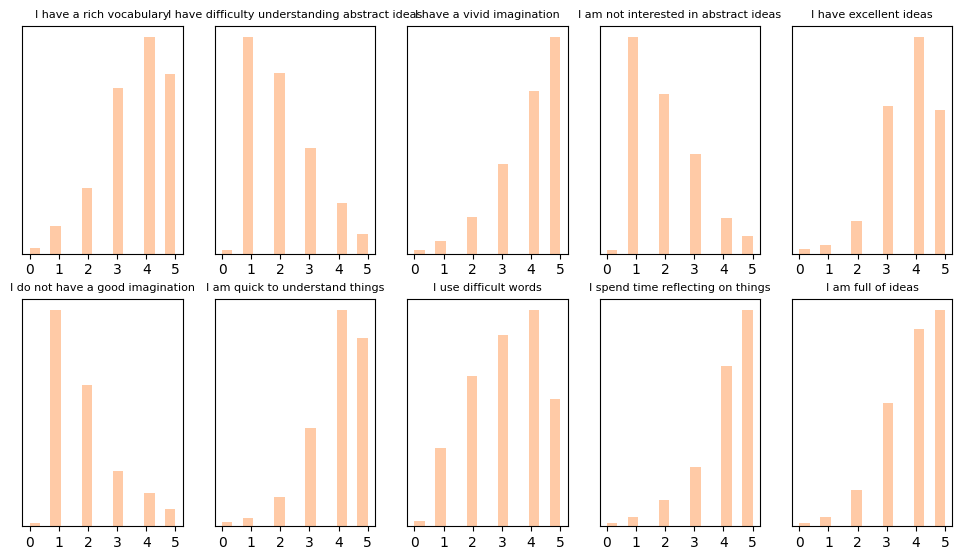

In [12]:
#Plot all questions
for i,t in enumerate(traits):
    vis_questions(t, colours(i/5))

In [14]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000
from sklearn.preprocessing import MinMaxScaler

df = data.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

In [15]:
%pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import warnings
warnings.filterwarnings("ignore")

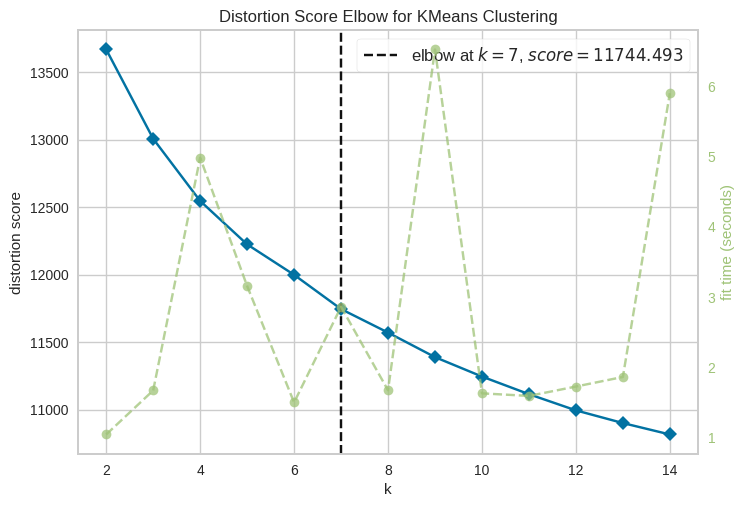

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

# **K- means **

In [18]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

# Use the unscaled data but without the country column
df_model = data.drop('country', axis=1)

# Define 5 clusters and fit my model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

In [19]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,549499,2.0,3.0,2.0,2.0,...,4.0,3.0,3.0,4.0,2
1,811367,2.0,3.0,2.0,4.0,...,4.0,4.0,4.0,4.0,0
2,450151,4.0,1.0,5.0,1.0,...,5.0,5.0,5.0,5.0,2
3,919073,1.0,4.0,3.0,5.0,...,5.0,5.0,4.0,4.0,4
4,894414,3.0,1.0,4.0,3.0,...,3.0,2.0,4.0,4.0,4


# Analysing the Model and Predictions

In [20]:
df_model.Clusters.value_counts()

3    10365
1    10128
2    10001
0     9806
4     9606
Name: Clusters, dtype: int64

In [21]:
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,717414.204467,2.637773,2.765960,3.249031,3.140118,3.264022,2.348256,2.738018,3.393127,2.966653,3.560473,3.290128,3.120131,3.841628,2.619621,2.822456,2.825515,3.050173,2.698144,3.103304,2.804303,2.221293,3.833469,2.288599,3.929635,2.279727,3.716296,2.197430,3.680808,3.774628,3.580971,3.311136,2.977361,3.979910,2.613196,2.592290,2.859678,3.681114,2.458087,3.179686,3.604732,3.719865,1.991026,4.026616,1.908831,3.830614,1.877320,4.006119,3.286967,4.194269,4.004895
1,311836.240719,2.672591,2.759479,3.297097,3.144352,3.291568,2.430095,2.799269,3.423381,2.957050,3.538408,3.323558,3.148203,3.886947,2.713369,2.894451,2.901264,3.090936,2.734005,3.107919,2.772709,2.326817,3.821584,2.259676,3.935821,2.272611,3.772117,2.192634,3.693523,3.814080,3.611868,3.280115,2.925948,3.995656,2.668246,2.691746,2.859301,3.685723,2.491311,3.193918,3.588566,3.611276,2.175553,3.988349,2.098934,3.759182,1.911236,3.939870,3.106438,4.074743,3.933353
2,516189.047495,2.644736,2.757524,3.282272,3.125987,3.285871,2.402560,2.787321,3.419258,2.978702,3.532347,3.287171,3.167383,3.834217,2.677132,2.842816,2.833617,3.042696,2.672833,3.090891,2.779222,2.277972,3.830317,2.252575,3.910309,2.252275,3.741526,2.201580,3.683932,3.781522,3.600340,3.289071,2.898810,3.994501,2.598440,2.644736,2.821918,3.719128,2.470353,3.211279,3.590041,3.645235,2.064894,4.004200,1.991301,3.817218,1.894911,3.967203,3.190281,4.126487,3.985901
3,104457.111819,2.624988,2.823734,3.270333,3.189966,3.239846,2.503232,2.766040,3.444187,2.977038,3.585432,3.216594,3.248046,3.828558,2.681235,2.806850,2.828075,3.055282,2.660685,3.101688,2.757356,2.299855,3.789001,2.353980,3.890014,2.307863,3.720116,2.238591,3.650072,3.741823,3.544042,3.264834,2.963821,3.933623,2.641100,2.562759,2.846310,3.675639,2.505644,3.147612,3.547902,3.639846,2.109600,3.987651,2.069561,3.754462,1.922238,3.970092,3.156874,4.078437,3.910950
4,914715.470747,2.663544,2.745888,3.324797,3.133042,3.315011,2.332396,2.789090,3.393296,2.973454,3.541849,3.296377,3.139080,3.864876,2.631793,2.830210,2.830731,3.034249,2.667812,3.052571,2.780762,2.193317,3.877160,2.176869,3.973246,2.239538,3.775245,2.164897,3.730377,3.824797,3.621382,3.358734,2.910369,3.993546,2.547158,2.687071,2.776286,3.750260,2.392775,3.271289,3.643764,3.702374,2.029148,4.007495,1.926817,3.836873,1.870185,4.012909,3.225276,4.179575,3.992817


In [22]:
# Summing up the different questions groups
col_list = list(df_model)
ext = col_list[1:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,2.650296,3.093157,3.072619,3.123343,3.244636
1,2.677488,3.133906,3.086157,3.140383,3.225415
2,2.668423,3.098110,3.071123,3.124858,3.229177
3,2.683936,3.101245,3.074867,3.108538,3.223666
4,2.667052,3.088955,3.073621,3.130887,3.243442


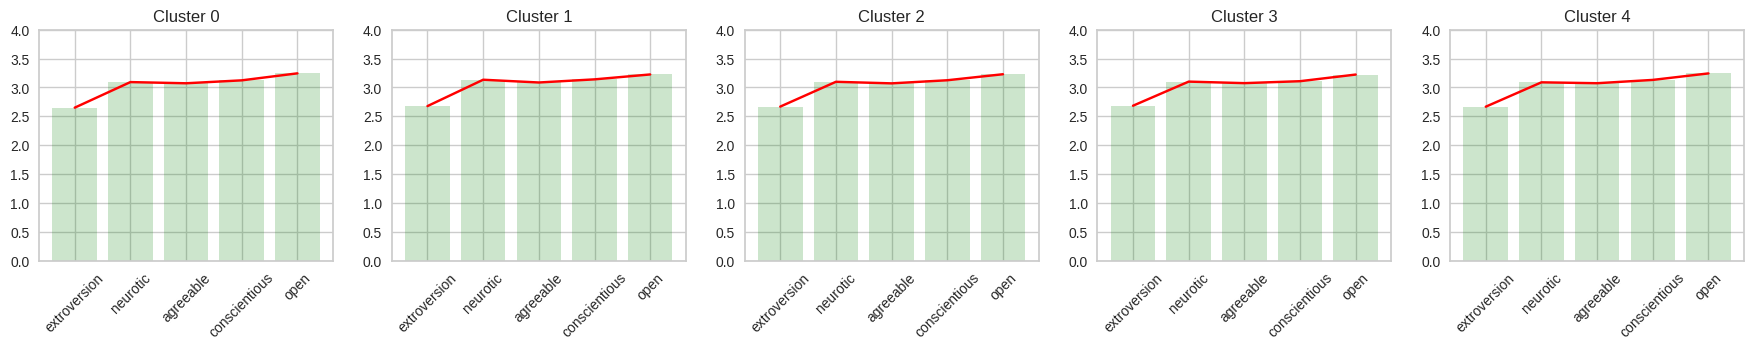

In [23]:
# Visualizing the means for each cluster
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[i,:], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[i,:], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4)

# Visualizing the Cluster Predictions

# PCA

In [24]:
# In order to visualize in 2D graph, PCA will be used
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,44046.698173,0.314354,2
1,305914.698172,2.163925,0
2,-55301.301828,-3.926704,2
3,413620.698172,3.312405,4
4,388961.698174,-0.858619,4


Text(0.5, 1.0, 'Personality Clusters after PCA')

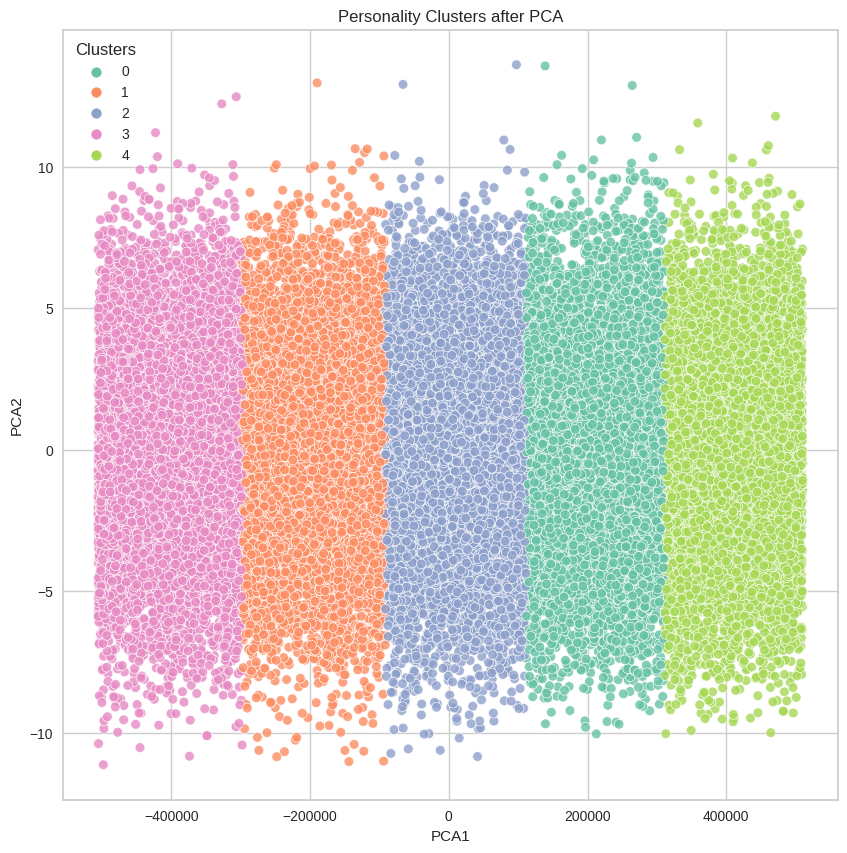

In [25]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA')

# **Assignment 3**

# **Task 1 **

In [26]:
#Task 1. Probably this could have been done in a quicker way.

# Adding  5 extra columns, each with the aggregated trait score (the mean of the 10 questions for that trait) for that participant.
#Code taken from https://www.statology.org/pandas-average-selected-columns/


data['mean_Ext'] = data[['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10']].mean(axis=1)
print(data['mean_Ext'])
data['mean_EST'] = data[['EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10']].mean(axis=1)
print(data['mean_EST'])
data['mean_AGR'] = data[['AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10']].mean(axis=1)
print(data['mean_AGR'])
data['mean_CSN'] = data[['CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10']].mean(axis=1)
print(data['mean_CSN'])
data['mean_OPN'] = data[['OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']].mean(axis=1)
print(data['mean_OPN'])

0        2.6
1        2.9
2        3.4
3        2.7
4        2.7
        ... 
49995    3.8
49996    2.5
49997    3.3
49998    3.6
49999    3.0
Name: mean_Ext, Length: 49906, dtype: float64
0        3.7
1        3.4
2        2.5
3        2.4
4        3.1
        ... 
49995    4.2
49996    3.8
49997    3.2
49998    1.9
49999    2.6
Name: mean_EST, Length: 49906, dtype: float64
0        3.0
1        3.3
2        3.6
3        2.6
4        2.7
        ... 
49995    3.4
49996    3.3
49997    3.8
49998    3.3
49999    3.1
Name: mean_AGR, Length: 49906, dtype: float64
0        2.0
1        3.2
2        2.6
3        2.8
4        2.8
        ... 
49995    3.0
49996    3.2
49997    3.5
49998    3.6
49999    3.2
Name: mean_CSN, Length: 49906, dtype: float64
0        2.6
1        3.5
2        3.6
3        3.4
4        2.7
        ... 
49995    2.5
49996    2.9
49997    3.6
49998    3.7
49999    3.6
Name: mean_OPN, Length: 49906, dtype: float64


In [36]:
# Showing the mean of each trait over the whole dataset. Code taken from https://sparkbyexamples.com/pandas/pandas-get-column-average-mean/?expand_article=1
mean_ext = data['mean_Ext'].mean()
print("The mean of the mean_Ext over the whole dataset:", mean_ext)

mean_est = data['mean_EST'].mean()
print("The mean of the mean_EST over the whole dataset:", mean_est)

mean_agr = data['mean_AGR'].mean()
print("The mean of the mean_AGR over the whole dataset:", mean_agr)

mean_csn = data['mean_CSN'].mean()
print("The mean of the mean_CSN over the whole dataset:", mean_csn)

mean_opn = data['mean_OPN'].mean()
print("The mean of the mean_OPN over the whole dataset:", mean_opn)

The mean of the mean_Ext over the whole dataset: 3.0248547268865464
The mean of the mean_EST over the whole dataset: 3.025952791247545
The mean of the mean_AGR over the whole dataset: 3.156991143349497
The mean of the mean_CSN over the whole dataset: 3.1257804672784837
The mean of the mean_OPN over the whole dataset: 3.2701037951348533


# **Task 2 **

I first wanted to create list in which I would store all the skew values for each question of each trait. I used the existing trait and keys_for_trait() as this was not as simple as above. I used a for loop to iterate through the data and store the vales.

In [37]:
from scipy.stats import skew

for trait in traits:   # Iterate over each trait and find the related questions
    trait_questions = keys_for_trait(trait)

    trait_skewness_list = []  # Create a list to store the trait skew values

    for question in trait_questions:  # calaculate the skew values for each questions and append to the list
        question_skewness = skew(data[question])
        trait_skewness_list.append(question_skewness)

# I wanted to have a look at the data, so I printed it.

    print(f"Skewness values for {trait}:")
    for i, skewness_value in enumerate(trait_skewness_list):
        print(f"Question {i+1}: {skewness_value}")
    print()  # Print an empty line between traits

Skewness values for EXT:
Question 1: 0.14922895404036676
Question 2: 0.15259657587671677
Question 3: -0.2792955091382903
Question 4: -0.17944379495610588
Question 5: -0.3732787551073541
Question 6: 0.5489333151896756
Question 7: 0.15056549502376185
Question 8: -0.3893711204227024
Question 9: -0.04883700220534794
Question 10: -0.5399730070658465

Skewness values for EST:
Question 1: -0.327408622349892
Question 2: -0.22179281101984893
Question 3: -0.953549292560431
Question 4: 0.2378309079734583
Question 5: 0.07559877865341474
Question 6: 0.048220478839306025
Question 7: -0.07243291504176515
Question 8: 0.22429204776082115
Question 9: -0.16621069631669297
Question 10: 0.13724153055905913

Skewness values for AGR:
Question 1: 0.7073888928479241
Question 2: -0.9354186617049717
Question 3: 0.593800012338043
Question 4: -1.0989636022906157
Question 5: 0.6828598326685161
Question 6: -0.8629854157353127
Question 7: 0.7124241149593249
Question 8: -0.7937644050038022
Question 9: -0.9035002353717

I then wanted to distinguish between which of the found value could be considered as positive, negative or symmetrical (no skew). I found this charategorisation of skewness (https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/): If the skewness is between -0.5 & 0.5, the data are nearly symmetrical. If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed. If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.

I thefore created a loop that would categorise the value based on the above figures.

In [48]:


trait_skewness_list = []


trait_skewness_types = []
for question in trait_questions:
        question_skewness = skew(data[question])
        trait_skewness_list.append(question_skewness)

        if question_skewness < -0.5:
            skewness_type = "negative"
        elif question_skewness > 0.5:
            skewness_type = "positive"
        else:
            skewness_type = "symmetrical"

        trait_skewness_types.append(skewness_type)

skewness_types.append(trait_skewness_types)

# Print the skewness types for each question of each trait
for i, trait in enumerate(traits):
    print(f"Skewness types for Trait {i+1} ({trait}):")
    for j, question in enumerate(keys_for_trait(trait)):
        skewness_type = skewness_types[i][j]
        print(f"Question {j+1}: {skewness_type}")
    print()


Skewness types for Trait 1 (EXT):
Question 1: negative
Question 2: positive
Question 3: negative
Question 4: positive
Question 5: negative
Question 6: positive
Question 7: negative
Question 8: symmetrical
Question 9: negative
Question 10: negative

Skewness types for Trait 2 (EST):
Question 1: negative
Question 2: positive
Question 3: negative
Question 4: positive
Question 5: negative
Question 6: positive
Question 7: negative
Question 8: symmetrical
Question 9: negative
Question 10: negative

Skewness types for Trait 3 (AGR):
Question 1: negative
Question 2: positive
Question 3: negative
Question 4: positive
Question 5: negative
Question 6: positive
Question 7: negative
Question 8: symmetrical
Question 9: negative
Question 10: negative

Skewness types for Trait 4 (CSN):
Question 1: negative
Question 2: positive
Question 3: negative
Question 4: positive
Question 5: negative
Question 6: positive
Question 7: negative
Question 8: symmetrical
Question 9: negative
Question 10: negative

Skew

Once I had the types for each of the questions of each trait, I used a for loop to firstly iterate over the list and then increment the types of positive/negative.

I then had to sort the values.

In [49]:
trait_ranks = []
for trait_skewness_types in skewness_types:
    rank = 0
    for skewness_type in trait_skewness_types:
        if skewness_type in ("positive", "negative"):
            rank += 1
    trait_ranks.append(rank)

# Sorting  the traits based on their ranksr
ranked_traits = [trait for _, trait in sorted(zip(trait_ranks, traits), reverse=True)]   # I was having issues sorting, so I used ChatGTP to debug and it suggested the zip function.


print("Ranking of Traits:")
for i, trait in enumerate(ranked_traits):
    print(f"{i+1}. {trait}")

Ranking of Traits:
1. OPN
2. EXT
3. EST
4. CSN
5. AGR


Comparing the ranking to the printed trait_skewness_types results, it seems to be correct, with AGR having the most skewed answers to the questions.


*Thank you for reading through - I am aware that possible this could have been done in much fewer coding lines - getting there! 😀